# Health Data for Education

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(12,8)})

# I. Cleaning and Gathering Datasets

## Dataset 1: Life Expectancy

In [242]:
life_exp_df = pd.read_csv("life-expectancy.csv")
life_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19028 entries, 0 to 19027
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entity           19028 non-null  object 
 1   Code             18445 non-null  object 
 2   Year             19028 non-null  int64  
 3   Life expectancy  19028 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 594.8+ KB


### Exploration

In [243]:

life_exp_df['Year'].describe()
life_exp_df['Life expectancy'].describe()
life_exp_df['Year'].unique()

The Life Expectancy of 242 Country, and data from 1543 to 2019, with values:
minimum: 17.76, 
maximum: 86.751, 
mean: 61.75

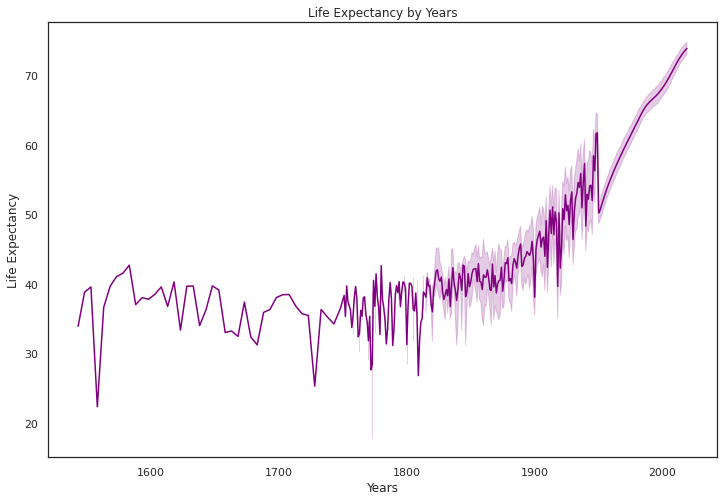

In [244]:
sns.lineplot(data= life_exp_df, x = life_exp_df['Year'], y = life_exp_df['Life expectancy'], color="purple")
plt.title("Life Expectancy by Years")
plt.ylabel('Life Expectancy')
plt.xlabel('Years')
plt.show()

### Looking for missing values

In [245]:
life_exp_df.isna().sum()

The Code column is the only column with missing data, so now we will get rid of it.

In [246]:
life_exp_df = life_exp_df[~life_exp_df['Code'].isna()]
life_exp_df.isna().sum()

Now we cleaned the data from missing values, now we will check other datasets about the topic.

## Dataset 2: Child Mortality

In [247]:
child_mort_df = pd.read_csv("child-mortality.csv")
child_mort_df.info()
child_mort_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Entity                                          13512 non-null  object 
 1   Code                                            13512 non-null  object 
 2   Year                                            13512 non-null  int64  
 3   Child mortality (Select Gapminder, v10) (2017)  13512 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 422.4+ KB


,Entity,Code,Year,"Child mortality (Select Gapminder, v10) (2017)"
0,Afghanistan,AFG,1957,38.1194
1,Afghanistan,AFG,1958,37.5190
2,Afghanistan,AFG,1959,36.9361
3,Afghanistan,AFG,1960,36.3700
4,Afghanistan,AFG,1961,35.7500


In [248]:
child_mort_df.rename(columns = {'Child mortality (Select Gapminder, v10) (2017)':'Child mortality'}, inplace = True)
child_mort_df['Child mortality'].describe()

The Child Mortality of 211 Country, and data from 1800 to 2016, with values: minimum: 0.21, maximum: 68.2, mean: 11.14


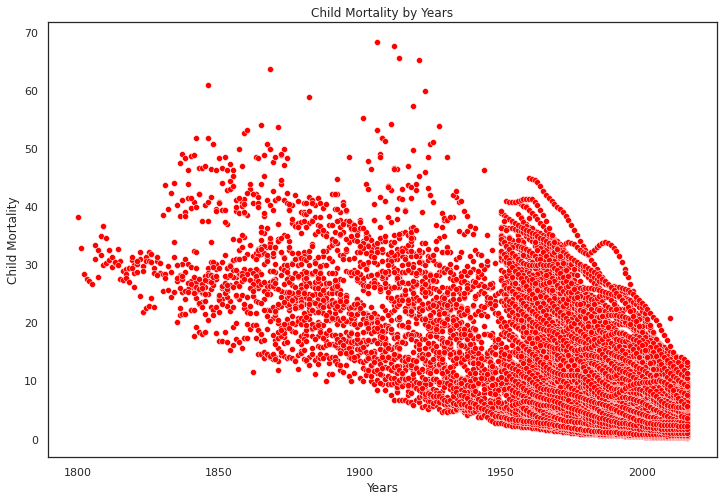

In [249]:
sns.scatterplot(x = child_mort_df['Year'], y = child_mort_df['Child mortality'], color = "red")
plt.title("Child Mortality by Years")
plt.ylabel('Child Mortality')
plt.xlabel('Years')
plt.show()

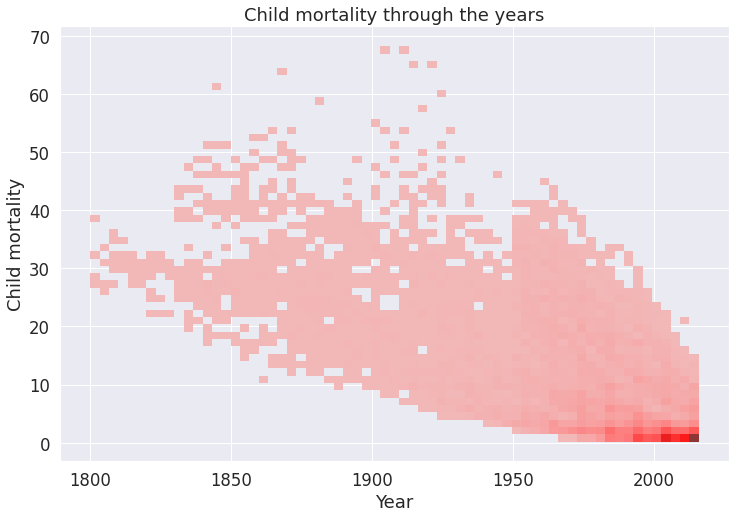

In [293]:
sns.histplot(data = child_mort_df, x = 'Year', y = 'Child mortality',color='red').set_title('Child mortality through the years')

### Looking for missing values

In [250]:
child_mort_df.isna().sum()

In this data set there are no missing data. Lets look for the other datasets.

## Dataset 2.1 Child Mortality dataset from 5-14 years, the years mostly in primary school

In [251]:
df_cmr = pd.read_csv("CHILDMORT5TO14.csv")
print(df_cmr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  195 non-null    object
 1   2019     195 non-null    object
 2   2018     195 non-null    object
 3   2017     195 non-null    object
 4   2016     195 non-null    object
 5   2015     195 non-null    object
dtypes: object(6)
memory usage: 9.3+ KB
None


### Changing the Objects to Numbers where necessary

In [252]:
dates = {'2019','2018', '2017', '2016', '2015'}

for date in dates:
    df_cmr[date] = df_cmr[date].str.extract(r'(\d+\.\d+)').astype('float')

print(df_cmr.head())

       Country  2019  2018  2017  2016  2015
0  Afghanistan   4.3   4.6   4.9   5.3   5.9
1      Albania   2.0   2.1   2.2   2.3   2.3
2      Algeria   3.3   3.4   3.5   3.5   3.6
3      Andorra   0.8   0.8   0.9   0.9   0.9
4       Angola  16.5  17.1  17.7  18.5  19.3


In [253]:
df_cmr.info()
df_cmr.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  195 non-null    object 
 1   2019     195 non-null    float64
 2   2018     195 non-null    float64
 3   2017     195 non-null    float64
 4   2016     195 non-null    float64
 5   2015     195 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.3+ KB


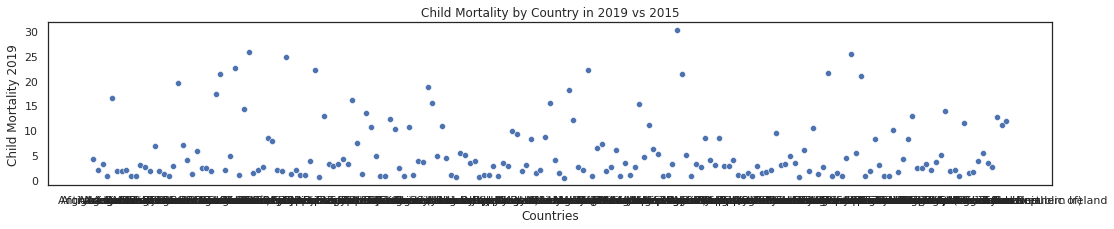

In [254]:
plt.figure(figsize =(18, 3))
sns.scatterplot(data= df_cmr, x = df_cmr['Country'], y = df_cmr['2019'] )
plt.title("Child Mortality by Country in 2019 vs 2015")
plt.ylabel('Child Mortality 2019')
plt.xlabel('Countries')
plt.show()

## Dataset 3: Maternal Mortality

In [255]:
matermal_mort_df = pd.read_csv("maternal-mortality.csv")
matermal_mort_df.info()
matermal_mort_df['Entity'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 4 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Entity                                                             7086 non-null   object 
 1   Code                                                               5916 non-null   object 
 2   Year                                                               7086 non-null   int64  
 3   Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015))  7086 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 221.6+ KB


In [256]:
matermal_mort_df.rename(columns = {'Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015))':'Maternal mortality'}, inplace = True)
matermal_mort_df.describe()

,Year,Maternal mortality
count,7086.000000,7086.000000
mean,1989.492520,285.192309
std,35.336845,359.723448
min,1800.000000,3.000000
25%,1992.000000,29.000000
50%,2000.000000,113.800000
75%,2008.000000,461.450000
max,2015.000000,2900.000000


Maternal Mortality for 229 Countries and data from 1800 to 2015, with minimum value: 3.0, maximum  value: 2900 and mean of 286.19 

In [257]:

matermal_mort_df = matermal_mort_df[~matermal_mort_df['Code'].isna()]
matermal_mort_df.isna().sum()

Only in the Code Column we had missing data, which we removed

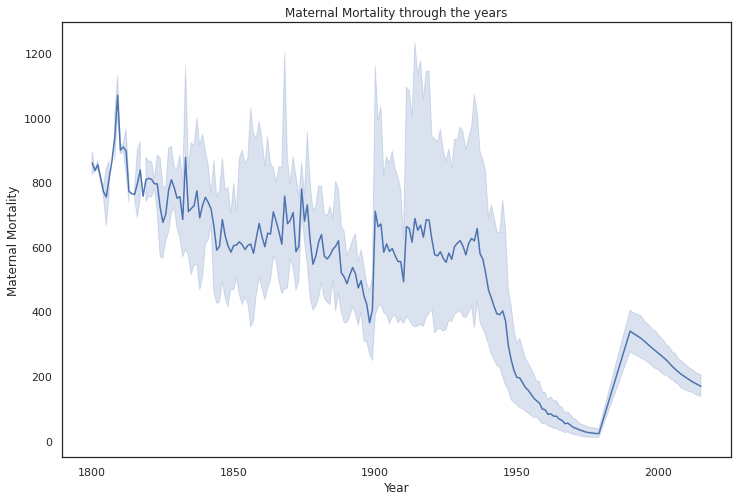

In [258]:
sns.lineplot(data = matermal_mort_df, x= matermal_mort_df['Year'], y= matermal_mort_df['Maternal mortality'])
plt.title("Maternal Mortality through the years")
plt.xlabel("Year")
plt.ylabel("Maternal Mortality")
plt.show()

As seen in the plot, the maternal mortality higly dropped through the years, mostly from 1950 to 1980, but after that we can see a high growing, but only for a short timeperiod.

## Dataset 4: Burden of disease

In [259]:
burden_dis_df = pd.read_csv("dalys-rate-from-all-causes.csv")
burden_dis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 4 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Entity                                                                                          6468 non-null   object 
 1   Code                                                                                            5488 non-null   object 
 2   Year                                                                                            6468 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate)  6468 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 202.2+ KB


In [260]:
burden_dis_df.rename(columns = {'DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate)':'Disability-Adjusted Life Years'}, inplace = True)
burden_dis_df.head()

,Entity,Code,Year,Disability-Adjusted Life Years
0,Afghanistan,AFG,1990,104103.069304
1,Afghanistan,AFG,1991,101240.743988
2,Afghanistan,AFG,1992,90918.470361
3,Afghanistan,AFG,1993,88234.359675
4,Afghanistan,AFG,1994,92997.694107


In [261]:
burden_dis_df = burden_dis_df[~burden_dis_df['Code'].isna()]
burden_dis_df.isnull().sum()

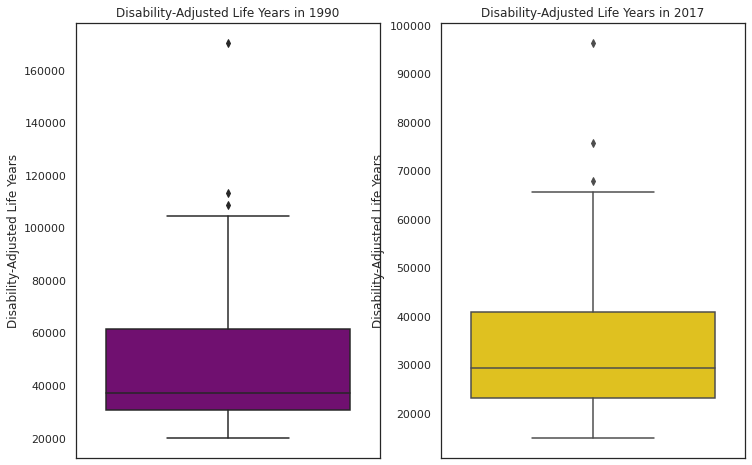

In [262]:
burden_dis_df_1990 = burden_dis_df[burden_dis_df['Year'] == 1990]
burden_dis_df_2017 = burden_dis_df[burden_dis_df['Year'] == 2017]
fig, axes = plt.subplots(1, 2)
sns.boxplot(data = burden_dis_df_1990, y = burden_dis_df_1990['Disability-Adjusted Life Years'], ax= axes[0], color='purple').set_title('Disability-Adjusted Life Years in 1990')
sns.boxplot(data = burden_dis_df_2017, y = burden_dis_df_2017['Disability-Adjusted Life Years'], ax= axes[1], color = 'gold').set_title('Disability-Adjusted Life Years in 2017')

## Dataset 5: Infectious diseases

In [263]:
infect_dis_df = pd.read_csv("deaths-and-new-cases-of-hiv.csv")
infect_dis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 6 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Entity                                                      6468 non-null   object 
 1   Code                                                        5488 non-null   object 
 2   Year                                                        6468 non-null   int64  
 3   Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)      6468 non-null   float64
 4   Incidence - HIV/AIDS - Sex: Both - Age: All Ages (Number)   6468 non-null   float64
 5   Prevalence - HIV/AIDS - Sex: Both - Age: All Ages (Number)  6468 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 303.3+ KB


In [264]:
infect_dis_df.rename(columns = {'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)':'Deaths(HIV/AIDS)'}, inplace = True)
infect_dis_df.rename(columns = {'Incidence - HIV/AIDS - Sex: Both - Age: All Ages (Number)':'Incidence(HIV/AIDS)'}, inplace = True)
infect_dis_df.rename(columns = {'Prevalence - HIV/AIDS - Sex: Both - Age: All Ages (Number)':'Prevalence(HIV/AIDS)'}, inplace = True)
infect_dis_df.head()

,Entity,Code,Year,Deaths(HIV/AIDS),Incidence(HIV/AIDS),Prevalence(HIV/AIDS)
0,Afghanistan,AFG,1990,32.098129,78.304642,39.825778
1,Afghanistan,AFG,1991,37.524158,83.233703,43.801984
2,Afghanistan,AFG,1992,50.670559,104.710195,54.325016
3,Afghanistan,AFG,1993,58.433049,128.605343,66.886983
4,Afghanistan,AFG,1994,65.531176,136.848748,73.556533


In [265]:
infect_dis_df = infect_dis_df[~infect_dis_df['Code'].isna()]
infect_dis_df.isnull().sum()

## Dataset 6: Education Out of School Children Dataset

In [266]:
edu_children_df = pd.read_csv('out-of-school-children-of-primary-school-age-by-world-region.csv')
edu_children_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6457 entries, 0 to 6456
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Entity                           6457 non-null   object
 1   Code                             4439 non-null   object
 2   Year                             6457 non-null   int64 
 3   Children out of school, primary  6457 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 201.9+ KB


In [267]:
edu_children_df.rename(columns = {'Children out of school, primary': 'Children out of primary school'},inplace = True)
edu_children_df.head()

,Entity,Code,Year,Children out of primary school
0,Afghanistan,AFG,1974,1445969
1,Afghanistan,AFG,1993,1979198
2,Albania,ALB,1999,8857
3,Albania,ALB,2000,12550
4,Albania,ALB,2001,16338


In [268]:
edu_children_df = edu_children_df[~edu_children_df['Code'].isna()]
edu_children_df.isnull().sum()

## II. Merging the Datasets

In [269]:
df = life_exp_df.merge(edu_children_df, on=['Entity','Year','Code'])\
    .merge(infect_dis_df, on=['Entity','Year','Code'])\
    .merge(burden_dis_df, on=['Entity','Year','Code'])\
    .merge(matermal_mort_df, on=['Entity','Year','Code'])\
    .merge(child_mort_df, on=['Entity','Year','Code'])
df.isnull().sum()

### Formating the Dataset
Dropping Entity and Renaming Code

In [270]:
df.drop('Entity', axis = 1, inplace = True)
df.rename(columns={'Code':'country'},inplace = True)
df.rename(columns={'Year':'year'},inplace = True)
df.head()

,country,year,Life expectancy,Children out of primary school,Deaths(HIV/AIDS),Incidence(HIV/AIDS),Prevalence(HIV/AIDS),Disability-Adjusted Life Years,Maternal mortality,Child mortality
0,AFG,1993,52.256,1979198,58.433049,128.605343,66.886983,88234.359675,1320.0,15.96
1,ALB,1999,73.587,8857,1.481622,2.885412,2.782037,29065.910934,42.0,2.74
2,ALB,2000,73.955,12550,1.579073,2.530153,2.584956,29406.931545,43.0,2.60
3,ALB,2001,74.288,16338,1.646260,2.535517,2.610241,28215.230037,40.0,2.48
4,ALB,2003,74.828,20987,1.746323,2.723245,2.722868,27543.537496,35.0,2.24


## III. Exploring the Educational Data

In [271]:
base_df = pd.read_csv("world_bank.csv")
base_df.head()

,country,year,adj_enrollment,out_school_percentage,out_school,first_grade_percentage,overage_percentage,grade_5_percentage,last_grade,completion_rate,pupils,repeater_percentage,enrollment_gross_percentage,enrollment_net_percentage
0,ABW,2000,98.24184,1.60268,134.0,106.07735,11.25985,95.905182,95.868622,97.142860,9263.0,7.58933,110.788177,98.08635
1,ABW,2001,96.62665,0.32258,28.0,NaN,12.57948,95.332321,94.048683,94.404068,9436.0,8.29801,109.440964,94.53929
2,ABW,2002,95.40839,1.81634,161.0,NaN,14.07520,94.846130,93.863274,94.755241,9840.0,7.92683,111.010834,95.31814
3,ABW,2003,93.97484,3.32156,301.0,100.33333,13.95372,94.920090,94.274101,90.215919,9897.0,8.96231,109.214302,93.93070
4,ABW,2004,94.77636,2.17652,200.0,101.67673,14.54099,93.996582,93.659683,90.559898,10185.0,8.52234,110.839050,94.63489


### Getting rid of the Missing values

In [272]:
base_df.isnull().sum()
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5586 entries, 0 to 5585
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      5586 non-null   object 
 1   year                         5586 non-null   int64  
 2   adj_enrollment               2909 non-null   float64
 3   out_school_percentage        3595 non-null   float64
 4   out_school                   3483 non-null   float64
 5   first_grade_percentage       3547 non-null   float64
 6   overage_percentage           2582 non-null   float64
 7   grade_5_percentage           1750 non-null   float64
 8   last_grade                   2866 non-null   float64
 9   completion_rate              3636 non-null   float64
 10  pupils                       4385 non-null   float64
 11  repeater_percentage          3389 non-null   float64
 12  enrollment_gross_percentage  4202 non-null   float64
 13  enrollment_net_per

As we can see, in the result table, the data has a lot of missing values, so in the following, we will get rid of them, by collecting all missing values, and then discard them from the dataset.

In [273]:
base_df.dropna(inplace=True)
base_df.isnull().sum()

base_df = base_df.loc[:, base_df.columns.intersection(['country','year','completion_rate'])]
base_df = base_df[base_df['year'] > 2009]
base_df

,country,year,completion_rate
115,ALB,2010,88.836243
116,ALB,2011,92.982658
117,ALB,2012,98.672127
118,ALB,2013,89.539177
119,ALB,2014,100.984718
...,...,...,...
5478,WSM,2018,104.781883
5514,YEM,2012,69.849213
5538,ZAF,2015,90.110489
5556,ZMB,2012,88.029610


After dropping the missing values, we can merge the base dataframe with our health dataframe on country and year.

In [274]:
base_df.set_index(['country', 'year'], inplace = True)
base_df

completion_rate 
 
 
 country 
 year 
 
 
 
 
 
 ALB 
 2010 
 88.836243 
 
 
 2011 
 92.982658 
 
 
 2012 
 98.672127 
 
 
 2013 
 89.539177 
 
 
 2014 
 100.984718 
 
 
 ... 
 ... 
 ... 
 
 
 WSM 
 2018 
 104.781883 
 
 
 YEM 
 2012 
 69.849213 
 
 
 ZAF 
 2015 
 90.110489 
 
 
 ZMB 
 2012 
 88.029610 
 
 
 ZWE 
 2012 
 97.090309 
 
 
 
 483 rows × 1 columns

In [275]:
base_df

completion_rate 
 
 
 country 
 year 
 
 
 
 
 
 ALB 
 2010 
 88.836243 
 
 
 2011 
 92.982658 
 
 
 2012 
 98.672127 
 
 
 2013 
 89.539177 
 
 
 2014 
 100.984718 
 
 
 ... 
 ... 
 ... 
 
 
 WSM 
 2018 
 104.781883 
 
 
 YEM 
 2012 
 69.849213 
 
 
 ZAF 
 2015 
 90.110489 
 
 
 ZMB 
 2012 
 88.029610 
 
 
 ZWE 
 2012 
 97.090309 
 
 
 
 483 rows × 1 columns

Setting the Country and Year into indexes.

## IV. Merging the Educational Data with Health Data

In [276]:
df = df.merge(base_df, on=['country','year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 323
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         324 non-null    object 
 1   year                            324 non-null    int64  
 2   Life expectancy                 324 non-null    float64
 3   Children out of primary school  324 non-null    int64  
 4   Deaths(HIV/AIDS)                324 non-null    float64
 5   Incidence(HIV/AIDS)             324 non-null    float64
 6   Prevalence(HIV/AIDS)            324 non-null    float64
 7   Disability-Adjusted Life Years  324 non-null    float64
 8   Maternal mortality              324 non-null    float64
 9   Child mortality                 324 non-null    float64
 10  completion_rate                 324 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 30.4+ KB


In [277]:
df.to_csv(r'healthdata.csv')

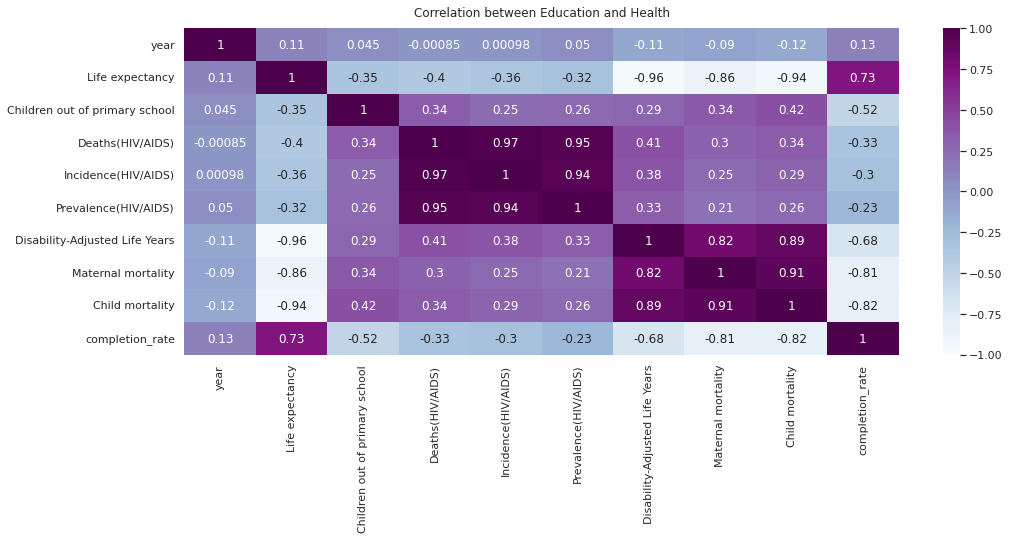

In [278]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="BuPu")
heatmap.set_title('Correlation between Education and Health', fontdict={'fontsize':12},pad = 12);

As seen on the heatmap of correlation, mostly the data of HIV deaths/incidence/prevelance correlates in a high score, and also the child mortality, with the maternal mortality has a high correlation. 

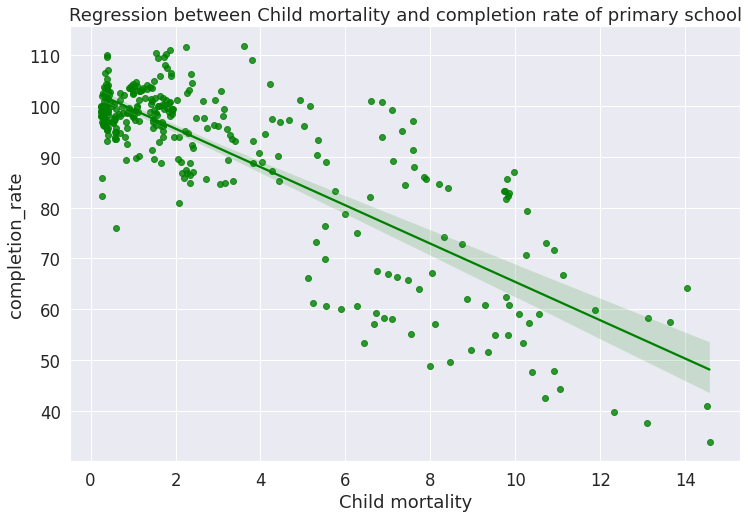

In [290]:
sns.set(font_scale = 1.5)
sns.regplot(data=df, y=df['completion_rate'], x=df['Child mortality'],color="green").set_title('Regression between Child mortality and completion rate of primary school')
plt.savefig("mortality-completion")

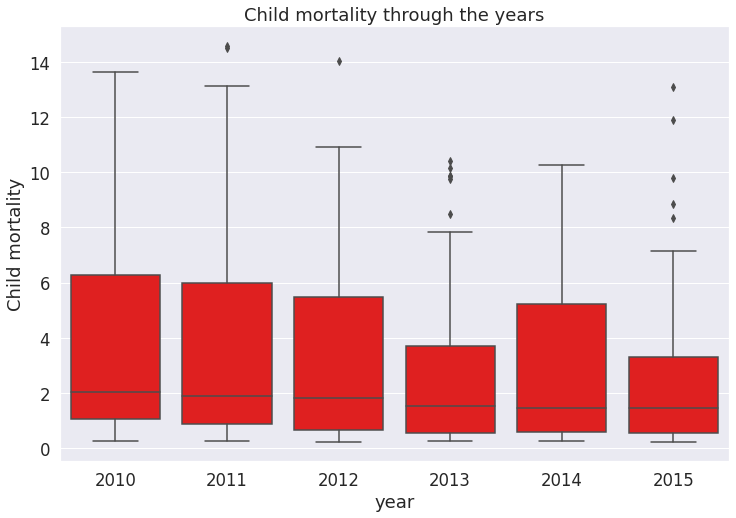

In [308]:
sns.boxplot(data = df, x = 'year', y = 'Child mortality',color='red').set_title('Child mortality through the years')
plt.savefig("mortality-year")

In [281]:
#sns.scatterplot(data=df[df.index.isin(['CAF','TCD','MLI','NER','SLE'])], y = 'Child mortality', x = 'year', hue='country').set_title("Countries through the Years with the highest child mortality rate")

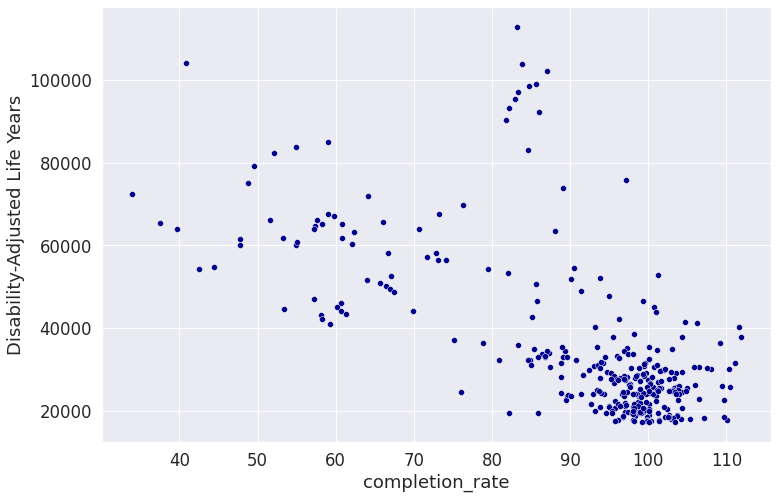

In [282]:
sns.scatterplot(data=df, x = df['completion_rate'], y = df['Disability-Adjusted Life Years'], color = "darkblue")

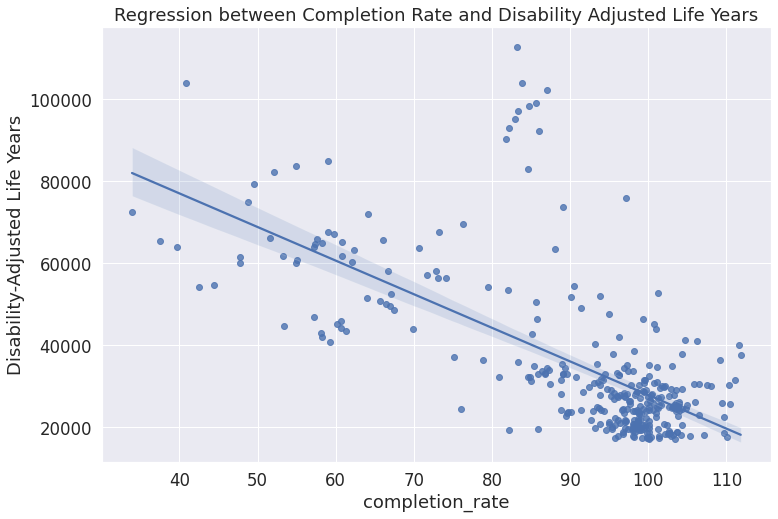

In [283]:
sns.regplot(data=df, x = df['completion_rate'], y = df['Disability-Adjusted Life Years']).set_title("Regression between Completion Rate and Disability Adjusted Life Years")

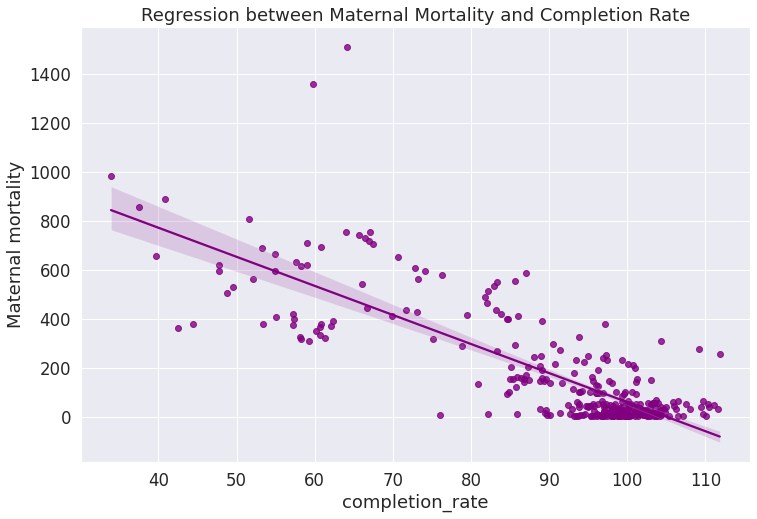

In [284]:
sns.regplot(data=df, x = df['completion_rate'], y = df['Maternal mortality'], color = 'purple').set_title("Regression between Maternal Mortality and Completion Rate")

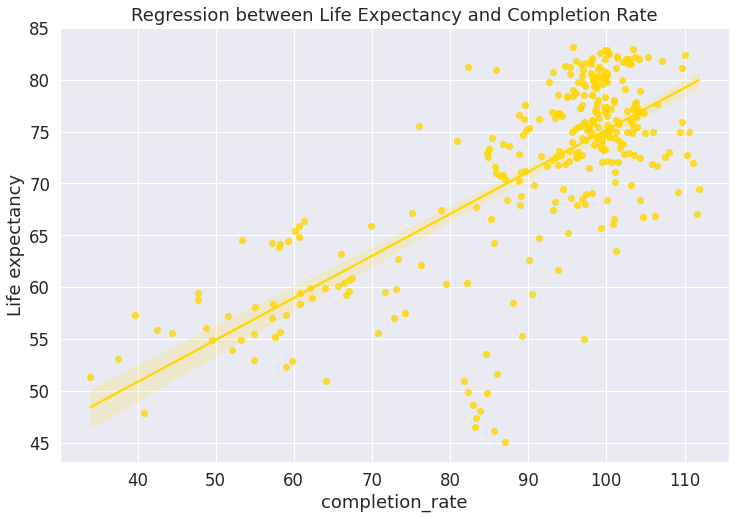

In [285]:
sns.regplot(data=df, x = df['completion_rate'], y = df['Life expectancy'], color = 'gold').set_title("Regression between Life Expectancy and Completion Rate")

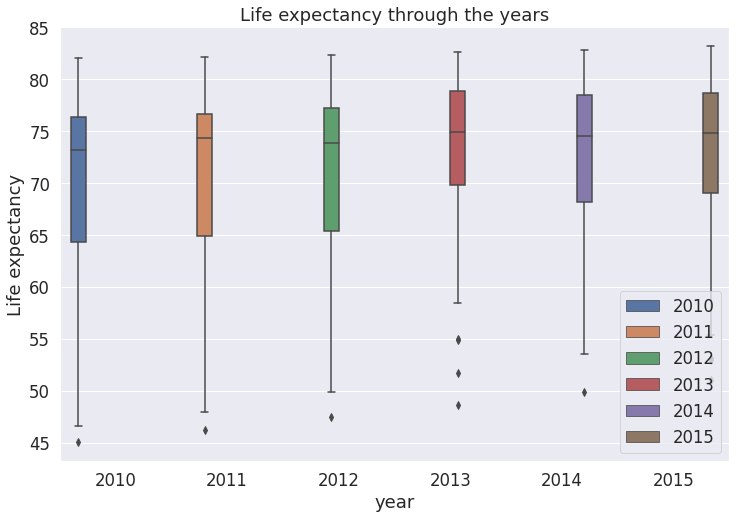

In [305]:
sns.boxplot(data = df, x = 'year', y = 'Life expectancy', hue='year').set_title('Life expectancy through the years')
plt.legend(loc='lower right')
plt.savefig("lifeexp-year")

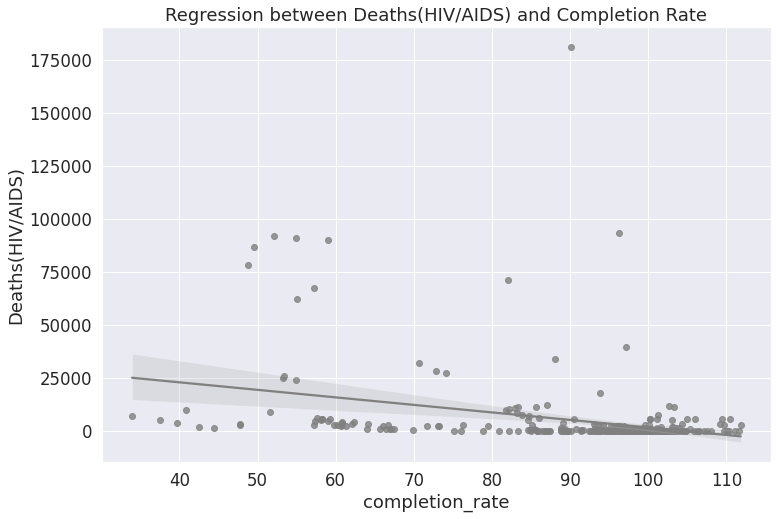

In [286]:
sns.regplot(data=df, x = df['completion_rate'], y = df['Deaths(HIV/AIDS)'], color = 'grey').set_title("Regression between Deaths(HIV/AIDS) and Completion Rate")

**Summary**
***
Based on the findings, the main goal was to prove the hypothesis that health care, mortality, and the number of infections have a huge impact on primary school graduation. From the first regression model, the completion rate has a much higher number with smaller amount of child mortality. This statement is also true for the cases with HIV/AIDS deaths, maternal mortality and disability-adjusted life years. From the plot, where the life expectancy was compared with the completion rate, the plot has clearly shown that the longer the life expectancy of a country, the more students are able to complete primary school in that country. In conclusion, based on the data presented above, health care can have a huge impact on the completion rate of primary school students.

## V. Prediction Model

## VI. Summary